<a href="https://colab.research.google.com/github/Imrul2322/Feature-Selection-using-Discriminative-Analysis/blob/main/Visualizing_higher_dimensional_data_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.datasets import cifar10


In [ ]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

In [ ]:
train_X = train_X.reshape(-1, 3072)
test_X = test_X.reshape(-1, 3072)
train_X.shape

(50000, 3072)

In [ ]:
train_X = (train_X - np.mean(train_X)) / np.std(train_X)
test_X = (test_X - np.mean(test_X)) / np.std(test_X)

In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist = tsne.fit_transform(test_X)

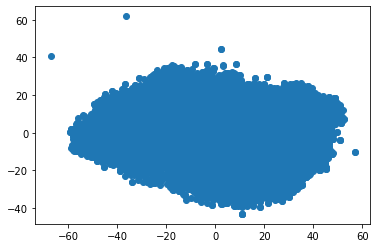

In [ ]:
plt.scatter(dim_two_mnist[:, 0], dim_two_mnist[:, 1])

In [ ]:
labels = np.squeeze(test_y.T)
print(labels[:5])
print(np.unique(labels))
dim_two_mnist.shape

[3 8 8 0 6]
[0 1 2 3 4 5 6 7 8 9]


(10000, 2)

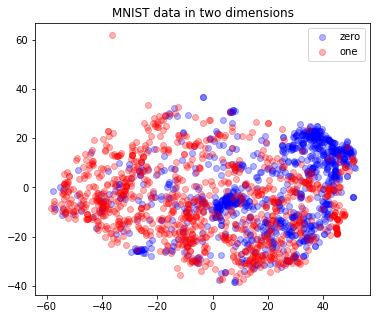

In [ ]:
plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist[labels == 0, 0], dim_two_mnist[labels == 0, 1], c = 'blue', label = 'zero', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 1, 0], dim_two_mnist[labels == 1, 1], c = 'red', label = 'one', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 2, 0], dim_two_mnist[labels == 2, 1], c = 'black', label = 'two', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 3, 0], dim_two_mnist[labels == 3, 1], c = 'violet', label = 'three', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 4, 0], dim_two_mnist[labels == 4, 1], c = 'cyan', label = 'four', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 5, 0], dim_two_mnist[labels == 5, 1], c = 'yellow', label = 'five', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 6, 0], dim_two_mnist[labels == 6, 1], c = 'green', label = 'six', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 7, 0], dim_two_mnist[labels == 7, 1], c = 'brown', label = 'seven', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 8, 0], dim_two_mnist[labels == 8, 1], c = '#A3C1AD', label = 'eight', alpha = 0.3)
# plt.scatter(dim_two_mnist[labels == 9, 0], dim_two_mnist[labels == 9, 1], c = '#ACE1AF', label = 'nine', alpha = 0.3)
plt.legend()
plt.show()

In [ ]:
# filtering label 0 and 1
# making train_y and test_y single dimension
test_y = np.squeeze(test_y.T)
train_y = np.squeeze(train_y.T)
# clustering with kmeans for selected features
train_X1 = train_X[np.where(train_y == 0), :]
test_X1 = test_X[np.where(test_y == 0), :]


test_X1.shape

(1, 1000, 3072)

In [ ]:
train_X1 = np.squeeze(train_X1)
test_X1 = np.squeeze(test_X1) 

In [ ]:
train_X2 = train_X[np.where(train_y == 1), :]
test_X2 = test_X[np.where(test_y == 1), :]

In [ ]:
train_X2 = np.squeeze(train_X2)
test_X2 = np.squeeze(test_X2)

In [ ]:
test_X2[0]

array([ 0.60053485, -1.319511  , -1.69415409, ..., -1.44439203,
       -1.4287819 , -1.46000216])

In [ ]:
train_X_two = np.concatenate([train_X1, train_X2])
test_X_two = np.concatenate([test_X1, test_X2])

In [ ]:
# train_y_two_ = np.concatenate([np.zeros(1000), np.ones(1)])
# train_y_two = np.concatenate([np.zeros(5923), np.ones(6742)]).reshape(12665, 1)
# print(train_y_two.shape)

test_y_two_ = np.concatenate([np.zeros(1000), np.ones(1000)])
test_y_two = np.concatenate([np.zeros(1000), np.ones(1000)]).reshape(2000, 1)
print(test_y_two.shape)

(2000, 1)


In [ ]:
# dataset = np.append(train_X_two, train_y_two, axis = 1)

dataset = np.append(test_X_two, test_y_two, axis = 1)
dataset.shape

(2000, 3073)

In [ ]:
labels = test_y_two_
labels.shape

(2000,)

In [ ]:
# train_X_two = (train_X_two - np.mean(train_X_two)) / np.std(train_X_two)
test_X_two = (test_X_two - np.mean(test_X_two)) / np.std(test_X_two)

In [ ]:
# shuffling rows of the dataset
np.random.shuffle(dataset)

In [ ]:
print(dataset)

[[-1.08535907 -0.25802224  0.52248421 ... -0.28924249  0.49126395
   0.        ]
 [ 1.83373503  1.94300594  2.0834971  ... -0.38290327 -1.22585023
   1.        ]
 [ 1.44348181  1.44348181  1.44348181 ... -0.24241211 -0.24241211
   0.        ]
 ...
 [ 0.46004369  0.60053485  0.74102601 ...  0.00734995 -0.14875133
   0.        ]
 [-0.14875133 -0.22680198 -0.60144507 ... -0.57022481 -1.30390087
   1.        ]
 [ 1.86495529  1.05322859  0.27272215 ... -0.58583494 -1.41317177
   1.        ]]


In [ ]:
T_X = dataset[:, :-1]
T_Y = dataset[:, -1]

In [ ]:
print(T_X)

[[-1.08535907 -0.25802224  0.52248421 ... -1.06974894 -0.28924249
   0.49126395]
 [ 1.83373503  1.94300594  2.0834971  ... -0.835597   -0.38290327
  -1.22585023]
 [ 1.44348181  1.44348181  1.44348181 ... -0.24241211 -0.24241211
  -0.24241211]
 ...
 [ 0.46004369  0.60053485  0.74102601 ...  0.00734995  0.00734995
  -0.14875133]
 [-0.14875133 -0.22680198 -0.60144507 ... -0.25802224 -0.57022481
  -1.30390087]
 [ 1.86495529  1.05322859  0.27272215 ... -0.03948043 -0.58583494
  -1.41317177]]


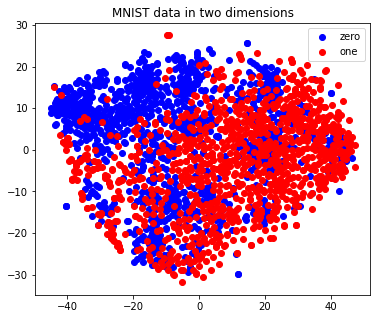

In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist01 = tsne.fit_transform(T_X)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist01[T_Y == 0, 0], dim_two_mnist01[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist01[T_Y == 1, 0], dim_two_mnist01[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=0)
# dim_two_mnist01 = (dim_two_mnist01 - np.mean(dim_two_mnist01)) / np.std(dim_two_mnist01)
predicted_result = kmeans.fit_predict(dim_two_mnist01)

print(predicted_result)
# print(kmeans.cluster_centers_.shape)

[1 1 0 ... 0 1 1]


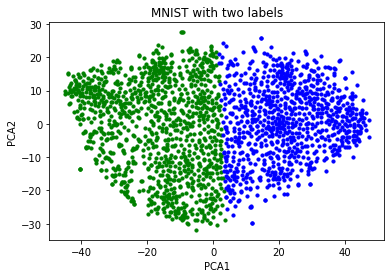

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist01[predicted_result==0, 0], dim_two_mnist01[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist01[predicted_result==1, 0], dim_two_mnist01[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.693


In [ ]:
import scipy.io as in_out
features = in_out.loadmat('featuresCifar.mat')

In [ ]:
features_dna = np.squeeze(features['ind'].T)
print(features_dna)

[1044 1852 1102 ... 3069 3070 3072]


## 100 features

In [ ]:
dataset_dna = T_X[:, features_dna[:100]]
print(dataset_dna.shape)

(2000, 100)


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

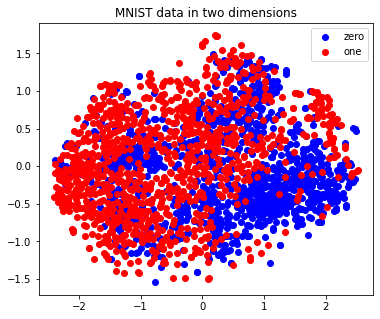

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

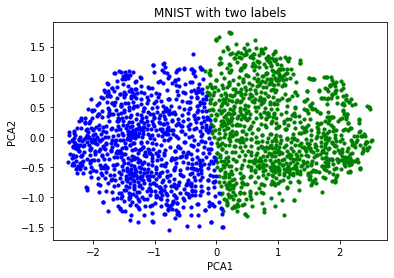

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.6705


## 75 features

In [ ]:
dataset_dna = T_X[:, features_dna[:75]]
print(dataset_dna)

[[ 0.02296008 -0.66388559 -0.38290327 ... -0.05509056 -1.56927306
   0.10101073]
 [-0.33607288 -1.58488319  0.81907666 ...  1.39665143  0.58492472
  -0.81998688]
 [ 1.89617555 -0.11753108  1.4903122  ...  1.86495529  1.3810413
   1.5995831 ]
 ...
 [ 0.33516266 -0.7263261   0.53809434 ...  0.50687408  0.70980575
   0.1946715 ]
 [ 1.78690465  1.30299065 -1.06974894 ...  1.75568439  0.13223099
  -1.17901984]
 [ 0.44443356  0.72541588 -0.35168301 ...  0.83468679 -1.60049332
  -0.27363236]]


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

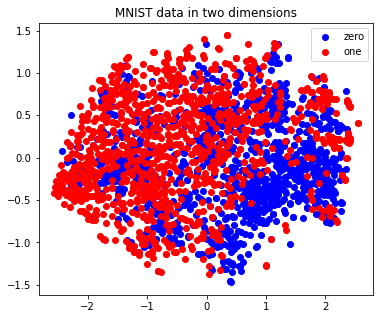

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

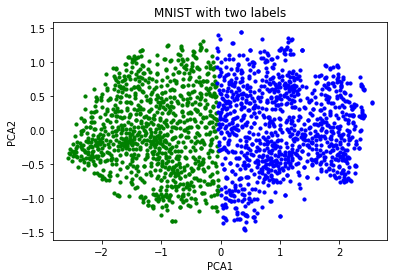

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.677


## 50 features

In [ ]:
dataset_dna = T_X[:, features_dna[:50]]
print(dataset_dna)

[[ 0.02296008 -0.66388559 -0.38290327 ... -1.66293384 -1.02291855
  -0.58583494]
 [-0.33607288 -1.58488319  0.81907666 ... -0.99169829 -0.35168301
   0.22589176]
 [ 1.89617555 -0.11753108  1.4903122  ...  1.97422619  1.50592233
  -0.52339443]
 ...
 [ 0.33516266 -0.7263261   0.53809434 ...  0.53809434  0.47565382
   1.75568439]
 [ 1.78690465  1.30299065 -1.06974894 ...  0.53809434 -1.81903512
   0.66297537]
 [ 0.44443356  0.72541588 -0.35168301 ... -0.88242739 -0.57022481
  -0.89803752]]


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

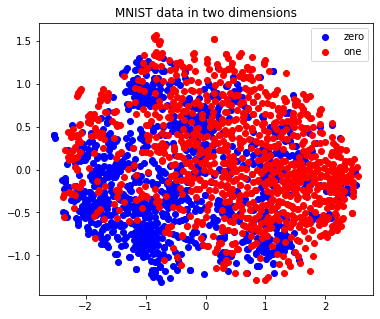

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

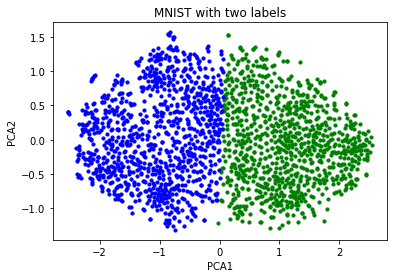

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.6665


## 25 features

In [ ]:
dataset_dna = T_X[:, features_dna[:25]]
print(dataset_dna)

[[ 0.02296008 -0.66388559 -0.38290327 ... -0.28924249 -0.25802224
  -0.05509056]
 [-0.33607288 -1.58488319  0.81907666 ... -0.30485262 -0.11753108
  -0.835597  ]
 [ 1.89617555 -0.11753108  1.4903122  ...  0.3039424   1.11566911
   1.89617555]
 ...
 [ 0.33516266 -0.7263261   0.53809434 ...  0.00734995  0.77224627
   0.66297537]
 [ 1.78690465  1.30299065 -1.06974894 ...  0.02296008 -1.44439203
   0.39760318]
 [ 0.44443356  0.72541588 -0.35168301 ... -0.66388559 -1.13218945
  -1.50683255]]


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

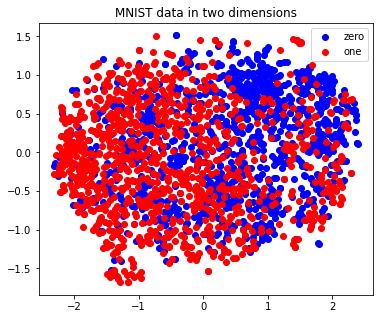

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

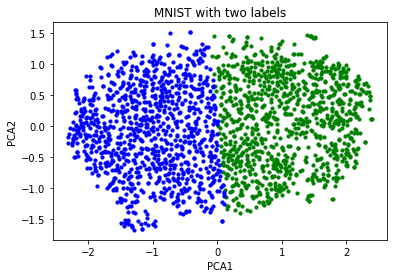

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(accuracy)

0.6735
